In [1]:
##Estimación de indicadores de seguridad
#Se borra todo lo que se encuentra en el entorno

rm(list=ls())

# Librerías ====
if(!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse,lubridate, showtext,srvyr,foreign)
font_add_google("Poppins", "pop")
showtext_auto()
remotes::install_github("cpyp-ipdp/funcionespgd", force = TRUE)
library(funcionespgd)

Cargando paquete requerido: pacman

Using GitHub PAT from the git credential store.




rlang  (1.1.4 -> 1.1.6) [CRAN]
glue   (1.7.0 -> 1.8.0) [CRAN]
cli    (3.6.3 -> 3.6.5) [CRAN]
tibble (3.2.1 -> 3.3.0) [CRAN]


Installing 4 packages: rlang, glue, cli, tibble

Warning message:
"package 'tibble' is in use and will not be installed"
Installing packages into 'C:/Users/claud/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\rlang\libs\x64\rlang.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"restored 'rlang'"


package 'glue' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glue'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\glue\libs\x64\glue.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\glue\libs\x64\glue.dll: Permission denied"
Warning message:
"restored 'glue'"


package 'cli' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'cli'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\cli\libs\x64\cli.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\cli\libs\x64\cli.dll: Permission denied"
Warning message:
"restored 'cli'"



The downloaded binary packages are in
	C:\Users\claud\AppData\Local\Temp\RtmpmcYZV9\downloaded_packages
── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file 'C:\Users\claud\AppData\Local\Temp\RtmpmcYZV9\remotes4c0829d52731\cpyp-ipdp-funcionespgd-6fd64b9/DESCRIPTION' ... OK
* preparing 'funcionespgd':
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted 'LazyData' from DESCRIPTION
* building 'funcionespgd_0.1.0.tar.gz'



Installing package into 'C:/Users/claud/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



In [2]:
getwd()

[1] "c:/Users/claud/Documents/GitHub/pgd_cdmx/indicadores/bienestar"

In [3]:
## leer excel
datos <- openxlsx::read.xlsx("datos_indicadores.xlsx")
datos

,year,porcentaje_pob,porcentaje_pobext
,<dbl>,<dbl>,<dbl>
1,2018,64.78474,18.700837
2,2020,62.83018,17.007159
3,2022,62.79059,14.327494
4,2023,61.75940,13.781536
5,2024,60.74515,13.256382
6,2025,59.74755,12.751239
7,2026,58.76634,12.265345
8,2027,57.80124,11.797966
9,2028,56.85199,11.348397


In [4]:
pobreza<-datos%>%
select(year,porcentaje_pob)%>%
intervals("porcentaje_pob", margen = 0.004, año_base = 2022)
pobreza

,year,estimado,superior,inferior
,<dbl>,<dbl>,<dbl>,<dbl>
1,2018,64.78474,64.78474,64.78474
2,2020,62.83018,62.83018,62.83018
3,2022,62.79059,62.79059,62.79059
4,2023,61.75940,62.00644,61.51335
5,2024,60.74515,61.23208,60.26209
6,2025,59.74755,60.46739,59.03628
7,2026,58.76634,59.71226,57.83541
8,2027,57.80124,58.96655,56.65896
9,2028,56.85199,58.23016,55.50644


In [5]:
pobrezaext<-datos%>%
select(year,porcentaje_pobext)%>%
intervals("porcentaje_pobext", margen = 0.007, año_base = 2022)
pobrezaext

,year,estimado,superior,inferior
,<dbl>,<dbl>,<dbl>,<dbl>
1,2018,18.700837,18.7008370,18.7008370
2,2020,17.007159,17.0071590,17.0071590
3,2022,14.327494,14.3274940,14.3274940
4,2023,13.781536,13.8780068,13.6857358
5,2024,13.256382,13.4426209,13.0727233
6,2025,12.751239,13.0208938,12.4871686
7,2026,12.265345,12.6123975,11.9278422
8,2027,11.797966,12.2167164,11.3935690
9,2028,11.348397,11.8334490,10.8832272


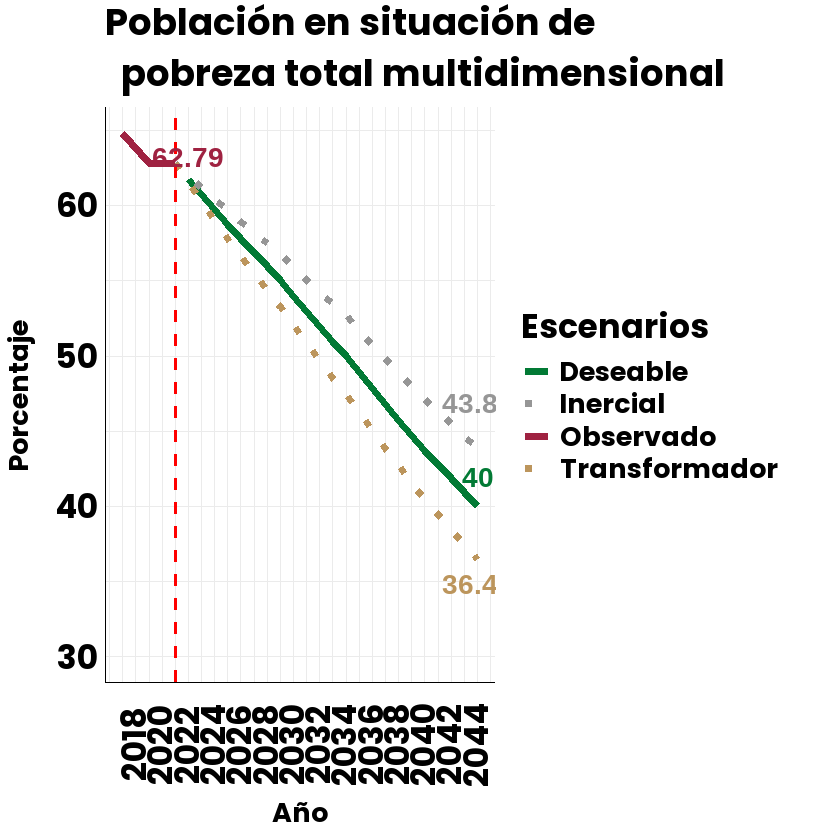

In [6]:
grafica_bonita(
  data = pobreza,
  x = "year",
  y = "estimado",
  titulo = "Población en situación de 
  pobreza total multidimensional",
   ano_base = 2022,
  mostrar_etiqueta_ano_base = TRUE,
  linea_vertical = 2022,
  anios_etiquetas = c(2045),
    desplazamiento_ano_base=c(1,0.4),
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Inercial",
  nombre_intervalo_inferior = "Transformador",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 30
)

ggsave("H:/Mi unidad/pgd/graficas//pobreza_estimada.png",
 width = 10, height = 6, dpi = 185, bg = "white")

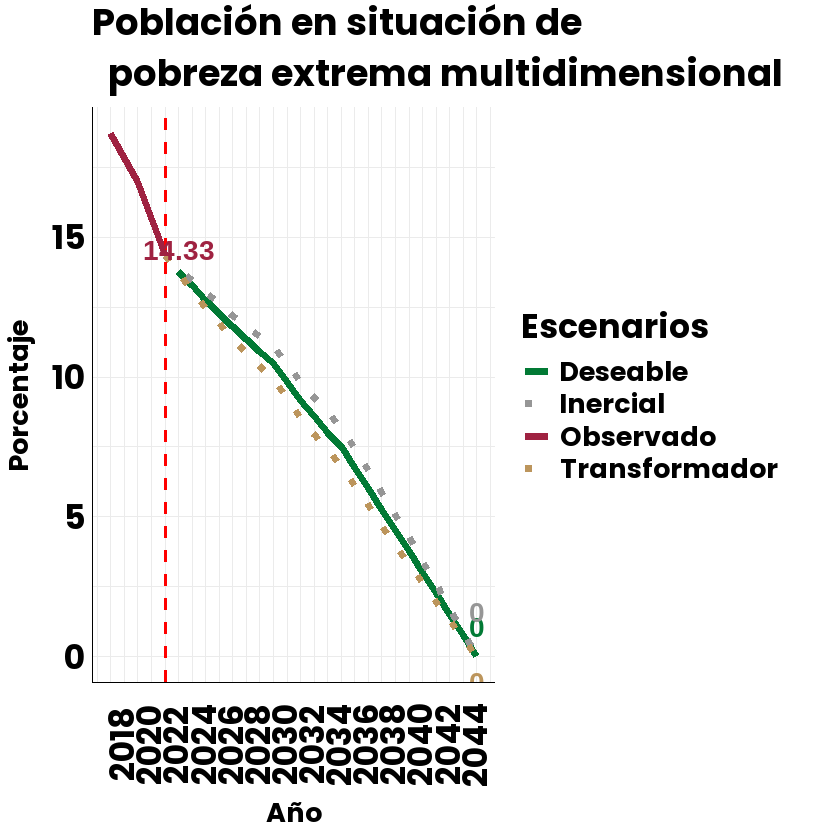

In [7]:
grafica_bonita(
  data = pobrezaext,
  x = "year",
  y = "estimado",
  titulo = "Población en situación de 
  pobreza extrema multidimensional",
  ano_base = 2022,
  mostrar_etiqueta_ano_base = TRUE,
  linea_vertical = 2022,
  desplazamiento_ano_base=c(1,0.2),
  anios_etiquetas = c(2045),
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Inercial",
  nombre_intervalo_inferior = "Transformador",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 0
)

ggsave("H:/Mi unidad/pgd/graficas/pobrezaext_estimada.png",
 width = 10, height = 6, dpi = 185, bg = "white")